# Study ARMA on synthetic data

## Takeaways
Not the best tool, since it always seems to look for seasonality.

## Helper functions

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [5]:
def fuzz(d):
    std = np.std(d)
    return d + np.random.uniform(-std/5.0, std/5.0, size=d.size)
fuzz(np.arange(10))

array([-0.48689771,  1.54608268,  2.26504215,  3.16932542,  3.8198161 ,
        4.87192229,  6.31492878,  6.55233888,  8.00370997,  9.17934109])

In [99]:

import pmdarima as pm
from pmdarima import model_selection
def study_prophet(y, show_components=False):
    arima = pm.auto_arima(y, error_action='ignore', trace=True,
                  suppress_warnings=True)
    x = np.arange(y.size * 2)
    plt.figure(figsize=(10, 5))
    plt.scatter(x[:y.size], y, marker='x')
    pred, conf_int = arima.predict(n_periods=y.shape[0], return_conf_int=True)
    plt.plot(x[y.size:], pred)
    
    plt.fill_between(x[y.size:], conf_int[:, 0], conf_int[:, 1],
                         alpha=0.1, color='b')
    plt.title('Actual test samples vs. forecasts')
    plt.show()

In [9]:
date_range = pd.date_range(start='1/1/2018', periods=300, freq='1D')

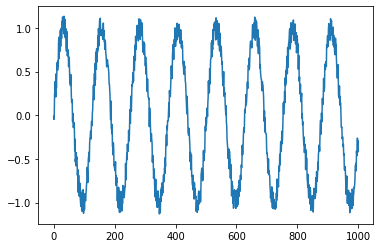

In [72]:
plt.plot(fuzz(np.sin(np.arange(0, 50, .05))))

## Studies

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1843.498, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2167.018, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1320.237, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1076.933, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2165.028, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-1473.924, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1460.122, Time=0.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1909.726, Time=0.85 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1463.988, Time=0.18 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1463.384, Time=1.19 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1904.683, Time=1.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-1754.243, Time=0.88 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1701.660, Time=0.89 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(3,0,2)(0,0,0)[0]     

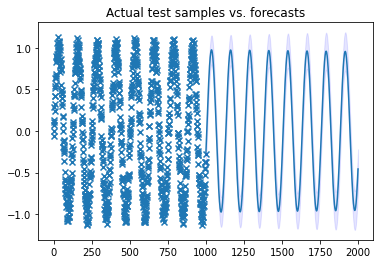

In [73]:
# Sine wave.
study_prophet(fuzz(np.sin(np.arange(0, 50, .05))))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2259.239, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2484.161, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2396.800, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2261.097, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2483.584, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2257.730, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2259.528, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2332.100, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2258.625, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2303.864, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2261.693, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2316.156, Time=0.03 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 1.597 seconds


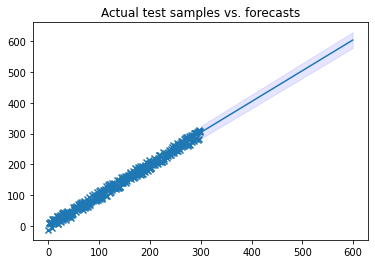

In [75]:
# Strong Trend with random noise.
study_prophet(fuzz(np.arange(date_range.size)))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3590.887, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3598.943, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3600.074, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3599.861, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3596.001, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3598.309, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3598.329, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3596.278, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-3598.050, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.824 seconds


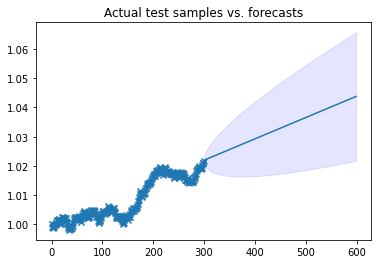

In [76]:
# Random walk with a very slight uptrend.
study_prophet((1+np.random.uniform(-.001, .00101, size=date_range.size)).cumprod(), show_components=True)

In [59]:
# Generate a momentum/mean reverting series with moving average.
import statsmodels.tsa.arima_process
def gen_series(arparams, maparams, size):
    ar = np.r_[1, -arparams] # add zero-lag and negate
    ma = np.r_[1, maparams] # add zero-lag
    d = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, size)
    return d


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=150.438, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=167.565, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=160.982, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=145.836, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=147.736, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=147.691, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=149.008, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.344 seconds


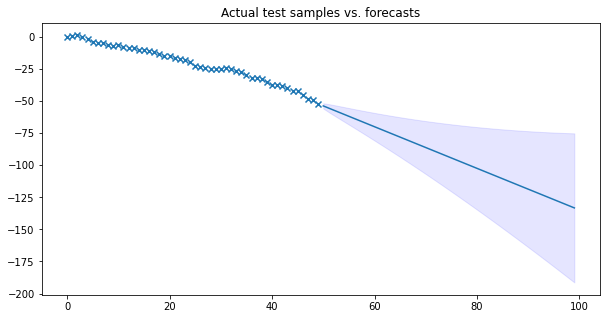

In [122]:
# Momentum.
study_prophet(gen_series(np.array([1.04, 0]), np.array([0, 0]), size=50), 
              show_components=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=165.875, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=183.041, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=166.356, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=171.652, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=181.713, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=167.319, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=170.173, Time=0.03 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=167.862, Time=0.07 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=167.845, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=168.340, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=167.194, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=166.965, Time=0.04 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=169.264, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=163.979, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=165.3

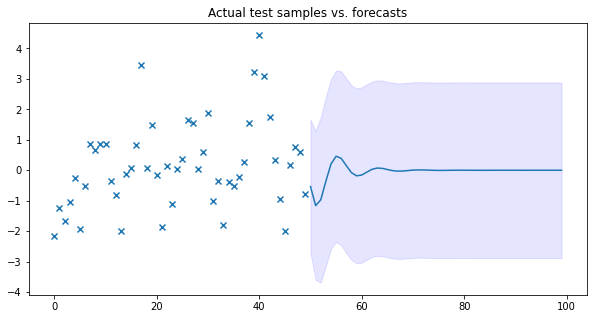

In [135]:
# Mean reverting.
study_prophet(gen_series(np.array([.5, 0]), np.array([0, 0]), size=50), 
              show_components=True)